In [2]:
import msprime
import matplotlib.pyplot as plt
from sympy import symbols, exp
from sympy.plotting import plot
from datetime import datetime

In [3]:
# set parameters
num=100000
n_samples=1
# num of recombinations per base per gen
pi=2e-7
# pi = 2e-7/gen/base
s_len=5000
# R = 2e-3/gen
pop_size=10000
# \pi LN = 10/gen (~1/gen)

# run the simulation

In [3]:
# define the function that finds the least coalescent time
def t_mrca_api(tree_s):
    t_ca_list = []
    for tree in tree_s.trees():
        t_ca_list.append(tree_s.tables.nodes[tree.root].time)
    return(min(t_ca_list))

In [4]:
# run the simulation num times
t_mrca_list = []
for idxx in range(num):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples,
        recombination_rate=pi,
        sequence_length=s_len,
        population_size=pop_size,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list.append(t_mrca_api(tree_s_sim))

In [5]:
# save the data
# with open("sim_"+datetime.now().strftime("%H_%M_%S")+".txt", 'w') as txtfile:
with open("sim_2mrca.txt", 'w') as txtfile:
    txtfile.write(str(t_mrca_list))

# plot the data

In [4]:
# import the data
with open("sim_2mrca.txt", 'r') as txtfile:
    t_mrca_list_text=txtfile.read();
start=1;
t_mrca_list=[];
for idx in range(num):
    if idx<num-1:
        end=t_mrca_list_text.index(", ");
        t_mrca_list.append(float(t_mrca_list_text[start:end]))
        t_mrca_list_text=t_mrca_list_text[end+1:len(t_mrca_list_text)];
    else:
        t_mrca_list.append(float(t_mrca_list_text[start:len(t_mrca_list_text)-1]))

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

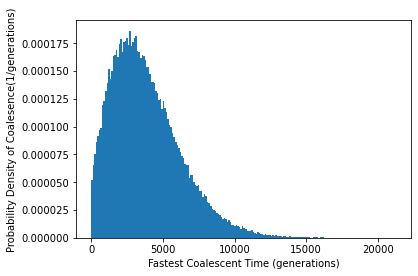

In [5]:
# plot the distribution
plt.hist(t_mrca_list, density=True, bins=200,range=(0,max(t_mrca_list)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

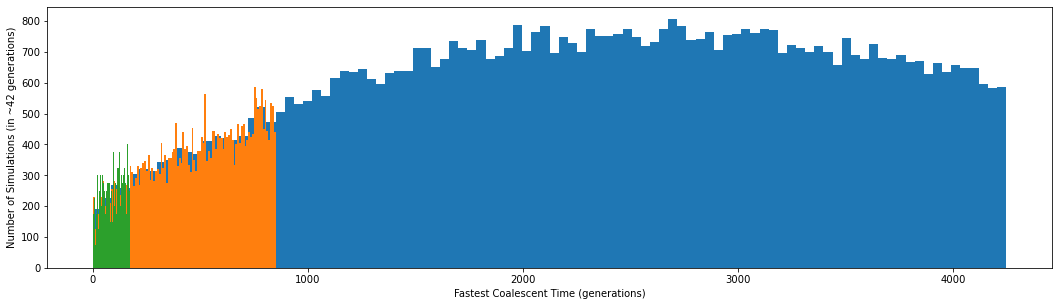

In [6]:
# zoom in to see if the start is 0 (if it looks nonzero)
plt.figure(figsize=(18,4.8))
plt.hist(t_mrca_list, density=False, bins=100,range=(0,max(t_mrca_list)/5))
plt.hist(t_mrca_list * 5, density=False, bins=100,range=(0,max(t_mrca_list)/25))
plt.hist(t_mrca_list * 25, density=False, bins=100,range=(0,max(t_mrca_list)/125))
# the lists are repeated to make the numbers comparable
plt.ylabel("Number of Simulations (in ~"+str(int(max(t_mrca_list)/5/100))+" generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

Text(0.5, 0, 'Fastest Coalescent Time (generations)')

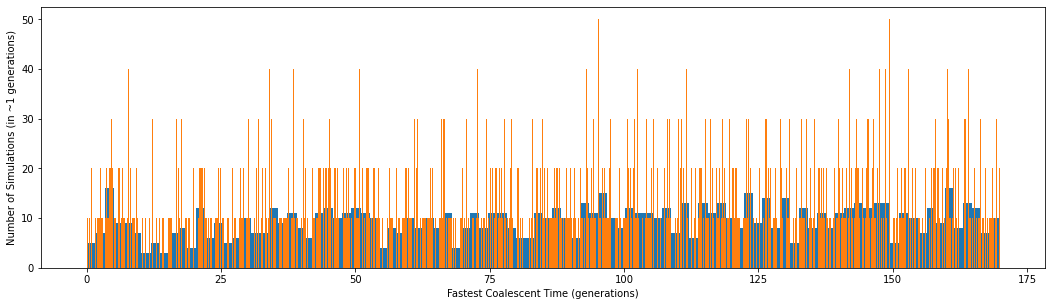

In [7]:
# zoom in even more
plt.figure(figsize=(18,4.8))
plt.hist(t_mrca_list, density=False, bins=100,range=(0,max(t_mrca_list)/125))
plt.hist(t_mrca_list*10, density=False, bins=1000,range=(0,max(t_mrca_list)/125))
plt.ylabel("Number of Simulations (in ~"+str(int(max(t_mrca_list)/125/100))+" generations)")
plt.xlabel("Fastest Coalescent Time (generations)")

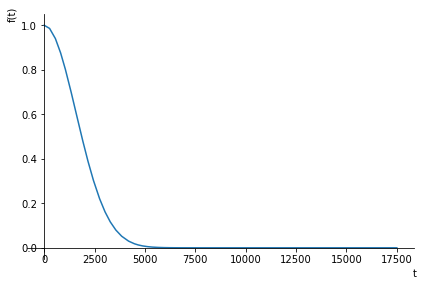

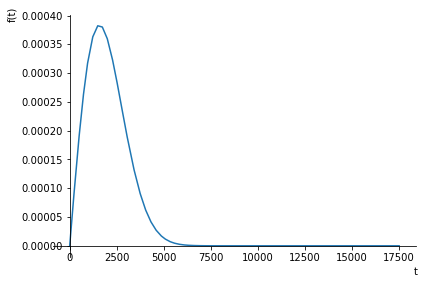

In [9]:
# plot the expectation
# CCDF ~ exp(- R t^2 / N)
# PDF ~ 2Rt exp(- R t^2 / N)/N
t=symbols('t')
plot(exp(-2*pi*s_len*t**2/pop_size),(t,0,17500))
plot(2*2*pi*s_len*t*exp(-2*pi*s_len*t**2/pop_size)/pop_size,(t,0,17500))

In [12]:
# data for prediction
xnum=[i for i in range(int(max(t_mrca_list)))]
y1num=[2*2*pi*s_len*t*exp(-2*pi*s_len*t**2/pop_size)/pop_size for t in range(int(max(t_mrca_list)))]
y2num=[pi*s_len*t*exp(-pi*s_len*t**2/pop_size/2)/pop_size for t in range(int(max(t_mrca_list)))]
y3num=[2*pi*s_len*t*exp(-pi*s_len*t**2/pop_size)/pop_size for t in range(int(max(t_mrca_list)))]

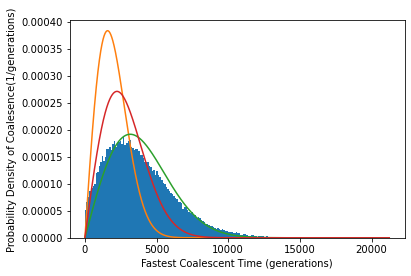

In [13]:
# overlay plot
plt.hist(t_mrca_list, density=True, bins=200,range=(0,max(t_mrca_list)))
plt.ylabel("Probability Density of Coalesence(1/generations)")
plt.xlabel("Fastest Coalescent Time (generations)")
plt.plot(xnum,y1num)
plt.plot(xnum,y2num)
plt.plot(xnum,y3num)